# Scikit-learn 

Scikit-learn è una libreria Python open source per il *machine learning*. Fornisce strumenti semplici ed efficienti per:

- Preprocessing dei dati
- Classificazione
- **Regressione**
- Clustering
- Riduzione della dimensionalità
- Selezione di feature
- Validazione e valutazione dei modelli

Basata su **NumPy**, **SciPy** e **matplotlib**, è uno standard nell’ecosistema scientifico Python.

---


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dati
df = pd.read_csv("shampoo_sales.csv")

df.head()


,Date,Sales
0,01-01-2012,266.0
1,01-02-2012,145.9
2,01-03-2012,183.1
3,01-04-2012,119.3
4,01-05-2012,180.3


In [3]:
# Assegniamo un indice progressivo ai mesi (0, 1, 2, ...)
df["MonthIndex"] = range(len(df))


# X (maiuscola) per rappresentare la matrice delle feature (variabili indipendenti)
X = df[["MonthIndex"]].values
# y (minuscola) per rappresentare il vettore target (variabile dipendente)
y = df["Sales"].values
df#così vedo la nuova colonna(indice)

,Date,Sales,MonthIndex
0,01-01-2012,266.0,0
1,01-02-2012,145.9,1
2,01-03-2012,183.1,2
3,01-04-2012,119.3,3
4,01-05-2012,180.3,4
5,01-06-2012,168.5,5
6,01-07-2012,231.8,6
7,01-08-2012,224.5,7
8,01-09-2012,192.8,8
9,01-10-2012,122.9,9


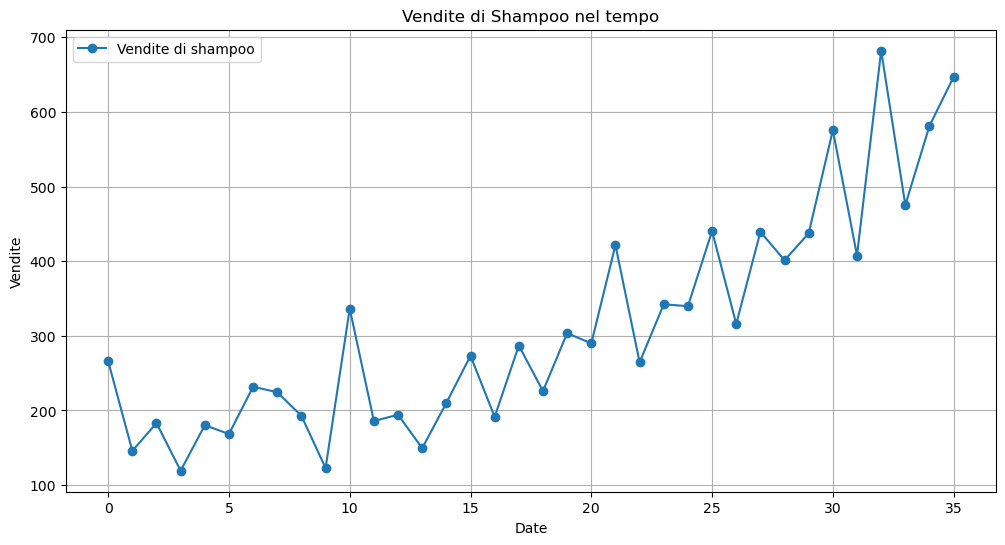

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(X, y, marker='o', linestyle='-', label='Vendite di shampoo')
plt.title('Vendite di Shampoo nel tempo')
plt.xlabel('Date')
plt.ylabel('Vendite')
plt.legend()
plt.grid(True)
plt.show()


## Divisione del dataset


### ` train_test_split`

- Serve a costruire un **dividere il dataset** in dati di train e di test 


In [5]:
from sklearn.model_selection import train_test_split

# Divisione train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#il 20% finale dei dati è di test
#shuffle dice se prenderli a caso

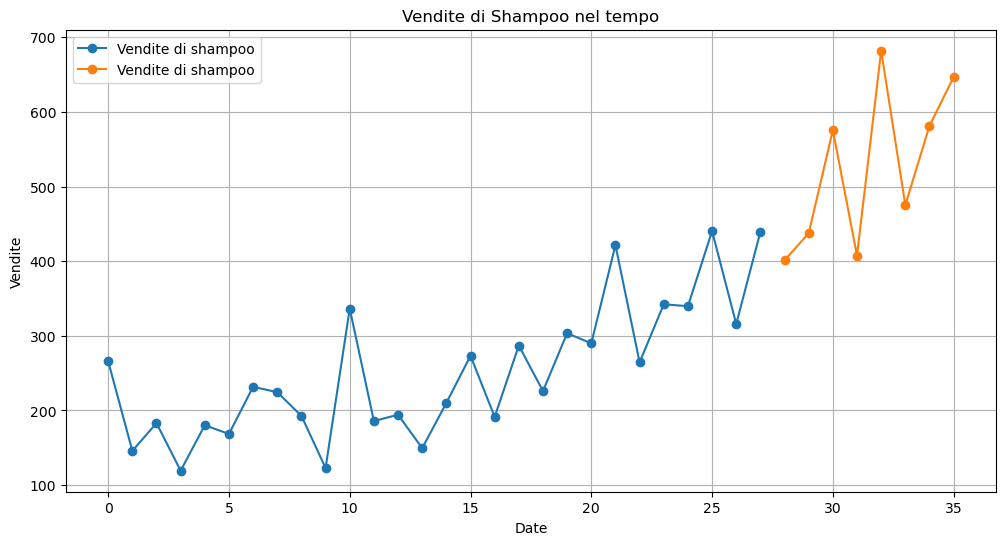

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(X_train, y_train, marker='o', linestyle='-', label='Vendite di shampoo')
plt.plot(X_test, y_test, marker='o', linestyle='-', label='Vendite di shampoo')
plt.title('Vendite di Shampoo nel tempo')
plt.xlabel('Date')
plt.ylabel('Vendite')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Split: prime 24 osservazioni per il training, il resto per il test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=24, shuffle=False)

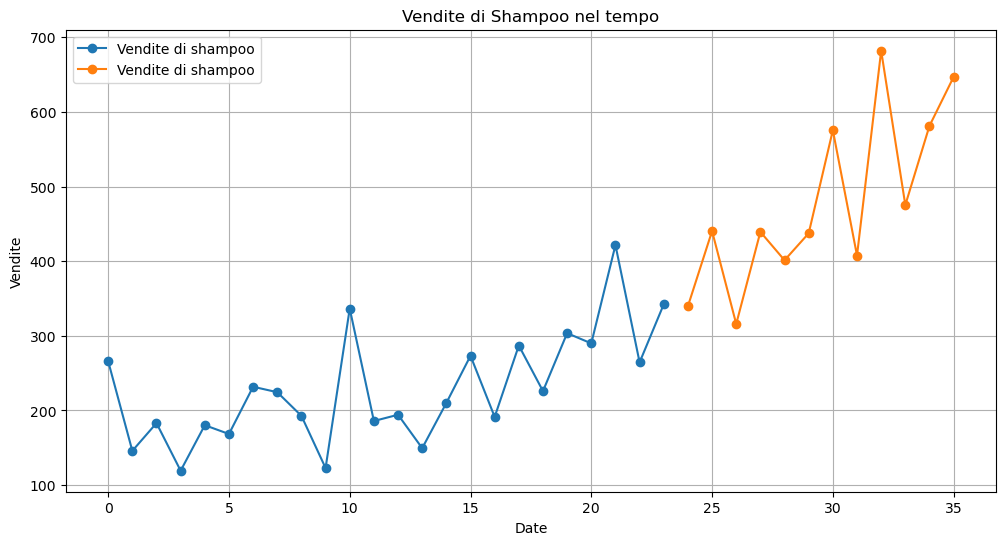

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(X_train, y_train, marker='o', linestyle='-', label='Vendite di shampoo')
plt.plot(X_test, y_test, marker='o', linestyle='-', label='Vendite di shampoo')
plt.title('Vendite di Shampoo nel tempo')
plt.xlabel('Date')
plt.ylabel('Vendite')
plt.legend()
plt.grid(True)
plt.show()


## Regressione con Scikit-learn


### `LinearRegression`

`LinearRegression` è una **classe** di `scikit-learn`, nel modulo `sklearn.linear_model`.

Serve a costruire un **modello di regressione lineare**, che cerca la **retta** (o iperpiano) che minimizza la somma degli errori quadrati tra i valori osservati e quelli previsti.


In [9]:
from sklearn.linear_model import LinearRegression

# Regressione lineare
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)


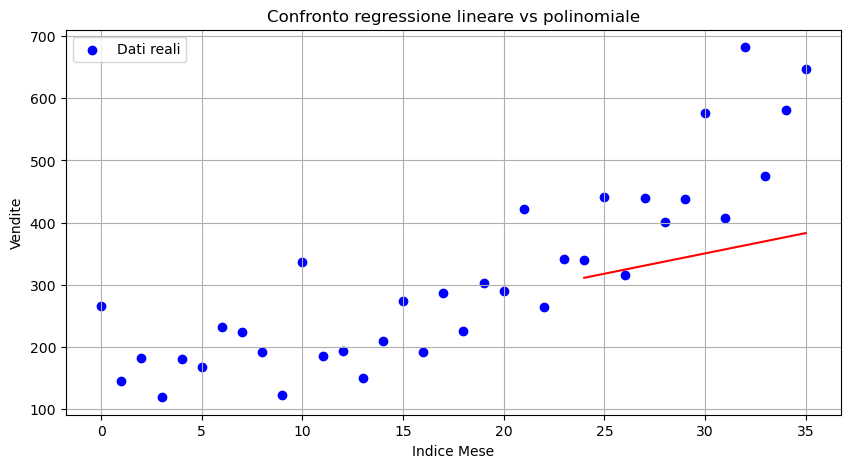

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Dati reali", color="blue")
plt.plot(X_test, y_pred_linear, color="red")
plt.xlabel("Indice Mese")
plt.ylabel("Vendite")
plt.title("Confronto regressione lineare vs polinomiale")
plt.legend()
plt.grid(True)
plt.show()

## `make_pipeline`

`make_pipeline` è una **funzione** di `scikit-learn`, nel modulo `sklearn.pipeline`.

Serve per **comporre una sequenza** di trasformazioni e di modellazione in un unico oggetto. Ogni trasformazione si applica in ordine e alla fine si esegue il modello.

Per fare una regressione polinomiale devo usare 

- `PolynomialFeatures(2)`che trasforma le variabili originarie aggiungendo i quadrati (e i prodotti se avessi più variabili).   Cioè genera nuove colonne:
  - una con \( x \) (termine lineare)
  - una con \( x^2 \) (termine quadratico)
  - una colonna costante \( 1 \)


- `LinearRegression()`che esegue la regressione sui dati trasformati.  Cioè calcola i coefficienti per combinare \( 1 \), \( x \) e \( x^2 \) e trovare la miglior curva.

e `make_pipeline` concatena i due passaggi insieme. Costruisce una sequenza automatica:
  - Prima espande le feature con `PolynomialFeatures`
  - Poi applica la regressione con `LinearRegression`


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Regressione polinomiale grado 2
model_poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())#prepara la "forma" del polinomio
model_poly2.fit(X_train, y_train)#cerca i coefficienti migliori
y_pred_poly2 = model_poly2.predict(X_test)#calcola i valori del polinomio nei punti avanti


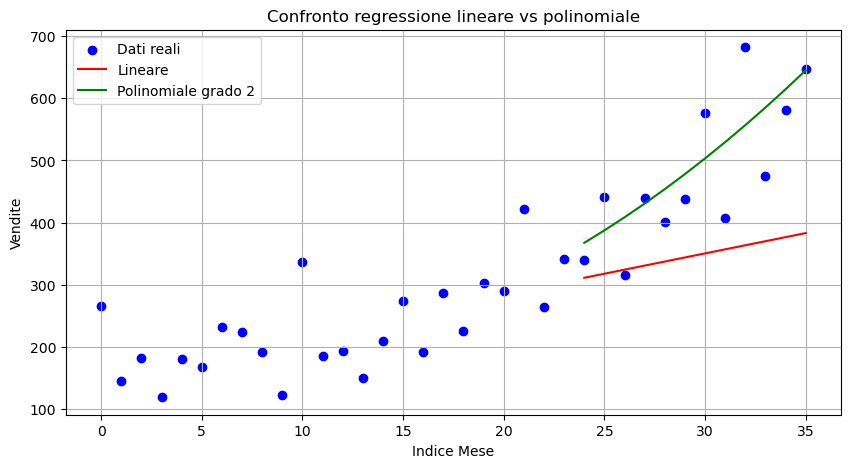

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Dati reali", color="blue")
plt.plot(X_test, y_pred_linear, label=f"Lineare", color="red")
plt.plot(X_test, y_pred_poly2, label=f"Polinomiale grado 2", color="green")
plt.xlabel("Indice Mese")
plt.ylabel("Vendite")
plt.title("Confronto regressione lineare vs polinomiale")
plt.legend()
plt.grid(True)
plt.show()


`mean_absolute_error` `root_mean_squared_error` è una funzione di **scikit-learn** che calcola direttamente MAE ed RMSE tra due insiemi di valori:

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_poly2 =  mean_absolute_error(y_test, y_pred_poly2)
rmse_linear = root_mean_squared_error(y_test, y_pred_linear)
rmse_poly2 =  root_mean_squared_error(y_test, y_pred_poly2)

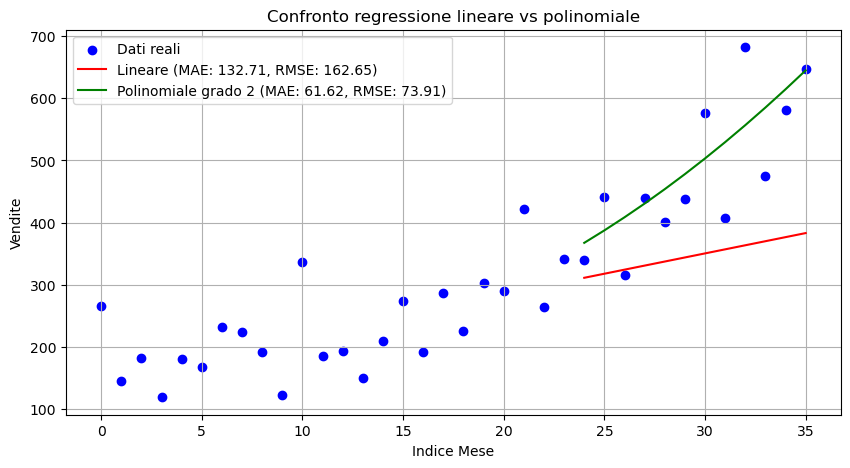

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Dati reali", color="blue")
plt.plot(X_test, y_pred_linear, label=f"Lineare (MAE: {mae_linear:.2f}, RMSE: {rmse_linear:.2f})", color="red")
plt.plot(X_test, y_pred_poly2, label=f"Polinomiale grado 2 (MAE: {mae_poly2:.2f}, RMSE: {rmse_poly2:.2f})", color="green")
plt.xlabel("Indice Mese")
plt.ylabel("Vendite")
plt.title("Confronto regressione lineare vs polinomiale")
plt.legend()
plt.grid(True)
plt.show()